#**Análise da Rede do Bairro Lagoa Nova - Natal/RN usando a biblioteca OSMnx**

Este projeto tem como objetivo explorar as funcionalidades da biblioteca OSMnx para realizar uma análise detalhada da rede viária do bairro Lagoa Nova, em Natal/RN. Utilizando diversas métricas de análise de rede, buscaremos responder a perguntas relevantes sobre a estrutura e o funcionamento da infraestrutura viária local.



In [ ]:
#Instalação da biblioteca
!pip install osmnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [ ]:
#Verificando a versão da bibliteca instalada
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.4'

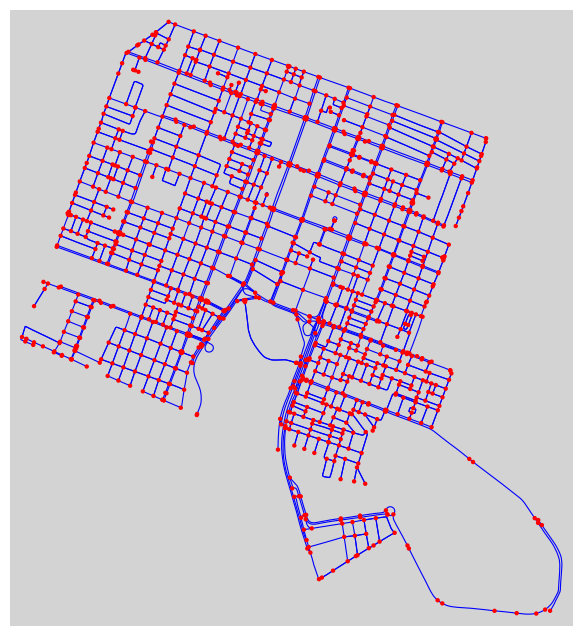

In [ ]:
# Download dos dados da rede viária do bairro de Lagoa Nova
G = ox.graph_from_place("Lagoa Nova,Natal , Rio Grande do Norte, BR", network_type="drive")  # Visualização para veículos motorizados (carros, caminhões, motos, etc.).

fig, ax = ox.plot_graph( G,
    node_color="red",        # Cor dos nós
    node_size=10,             # Tamanho dos nós
    edge_color="blue",       # Cor das arestas
    edge_linewidth=0.8,      # Largura das arestas
    bgcolor="lightgray"      # Cor de fundo do gráfico
                         )

No mapa gerado pelo OSMnx, os nós e arestas são elementos essenciais da estrutura da rede viária:


*  Nós: Os nós representam pontos de interseção, cruzamentos ou locais onde as ruas começam ou terminam, como acessos e ramificações.

*  Arestas: As arestas correspondem às ruas ou segmentos de rua que ligam dois nós, representando os trechos percorríveis da via entre interseções ou outros pontos importantes na rede.




# **Análise da Rede**



*   **Quantos componentes conectados existem na rede viária de Lagoa Nova e qual é o tamanho do maior componente conectado ?**

componentes conectados são sub-redes onde todos os nós estão interligados, permitindo viajar de qualquer nó para qualquer outro dentro desse mesmo grupo sem sair do componente. A presença de múltiplos componentes conectados indica áreas isoladas entre si, onde a circulação só é possível com ligações externas.

o tamanho do maior componente conectado representa o número de nós na maior dessas sub-redes, ou seja, a área com a maior interconectividade na rede.


Número total de componentes conectados: 33
Tamanho do maior componente conectado: 1155


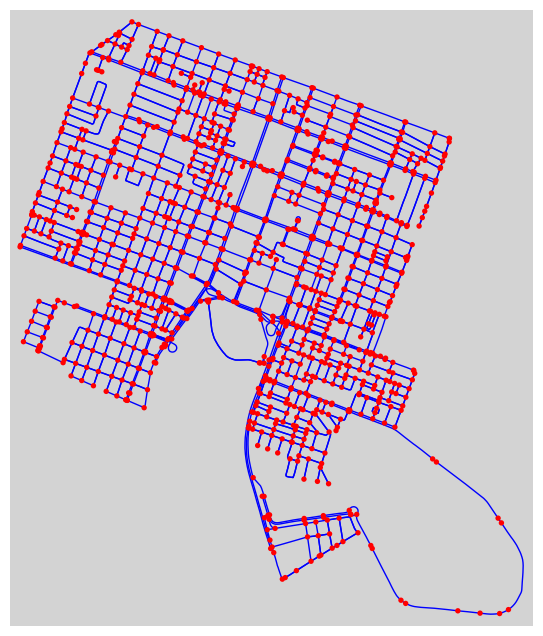

In [ ]:

# Encontrar os componentes conectados da rede
connected_components = list(nx.strongly_connected_components(G))

# Número total de componentes conectados
num_components = len(connected_components)
print(f"Número total de componentes conectados: {num_components}")

# Encontrar o maior componente conectado (componente gigante)
largest_component = max(connected_components, key=len)
G_largest = G.subgraph(largest_component).copy()
largest_component_size = len(largest_component)
print(f"Tamanho do maior componente conectado: {largest_component_size}")

# Visualizar o maior componente conectado
fig, ax = ox.plot_graph(G_largest, node_color="red", edge_color="blue", bgcolor="lightgray")


A presença de 33 componentes conectados no bairro de Lagoa Nova indica que a rede viária está fragmentada em sub-redes independentes, resultando em áreas desconectadas que funcionam como "ilhas". Essa situação limita a conectividade e compromete a mobilidade, exigindo desvios e rotas restritas para acessar diferentes regiões. Assim, essa configuração pode dificultar o deslocamento dos moradores, especialmente em situações de congestionamento ou bloqueio de vias, ressaltando a necessidade de intervenções para melhorar a integração e acessibilidade do bairro.


O maior componente conectado da rede viária de Lagoa Nova, tem tamanho de 1155, representa a sub-rede mais extensa e interconectada do bairro. Essa parte da rede é crucial para a mobilidade, pois contém a maioria das vias principais, facilitando o deslocamento dos moradores e o acesso a serviços e infraestrutura. No entanto, a disparidade em relação aos outros componentes isolados destaca a necessidade de intervenções que integrem essas áreas desconectadas ao maior componente. Melhorar a conectividade pode resultar em uma rede viária mais acessível e eficiente, beneficiando todos os habitantes do bairro.








*   **Qual é o coeficiente de agrupamento médio da rede de Lagoa Nova?**

O coeficiente de agrupamento (Clustering Coefficient) médio mede o grau de conectividade entre os vizinhos de um nó. Em redes viárias, isso indica o quão conectadas estão as interseções próximas entre si, formando pequenas "sub-redes" locais ou "clusters" de ruas.




In [ ]:
# Converter o multigrafo para um grafo simples
G_simple = nx.Graph(G)

# Calcular o coeficiente de agrupamento para cada nó
clustering_coeffs = nx.clustering(G_simple)

# Calcular o coeficiente de agrupamento médio
average_clustering_coeff = sum(clustering_coeffs.values()) / len(clustering_coeffs)

# Exibir o resultado
print(f"Coeficiente de agrupamento médio da rede: {average_clustering_coeff:.4f}")



Coeficiente de agrupamento médio da rede: 0.0254


O coeficiente de agrupamento médio de 0,0254 revela uma conectividade muito baixa entre as interseções da rede viária de Lagoa Nova, indicando poucas alternativas de rotas locais. Esse valor sugere uma dependência das vias principais, o que pode aumentar o congestionamento nessas áreas. Uma alternativa para melhorar a mobilidade é criar mais conexões entre ruas próximas poderia elevar o coeficiente de agrupamento, promovendo uma rede mais integrada, com rotas alternativas que diminuem a pressão sobre as vias principais e facilitam o deslocamento pelo bairro.



*   **Qual o caminho mais curto para ir do Departamento de Engenharia de Computação e Automação (DCA) ao Arena das Dunas?**


Para encontrar o caminho mais curto do DCA até o Arena das Dunas,utilizaremos a biblioteca OSMnx e NetworkX para calcular a rota entre os dois pontos.



In [ ]:
# obtém os nós da rede mais próximos de dois pontos lat/lng com o módulo de distância
orig = ox.distance.nearest_nodes(G, X=-5.8428, Y=-35.1974) # Origem DCA/UFRN
dest = ox.distance.nearest_nodes(G, X=-35.2128, Y=-5.8267)# Destino Arena das Dunas

/usr/local/lib/python3.10/dist-packages/osmnx/routing.py:74: UserWarning: The attribute 'travel_time' is missing or null on some edges.
  _verify_edge_attribute(G, weight)


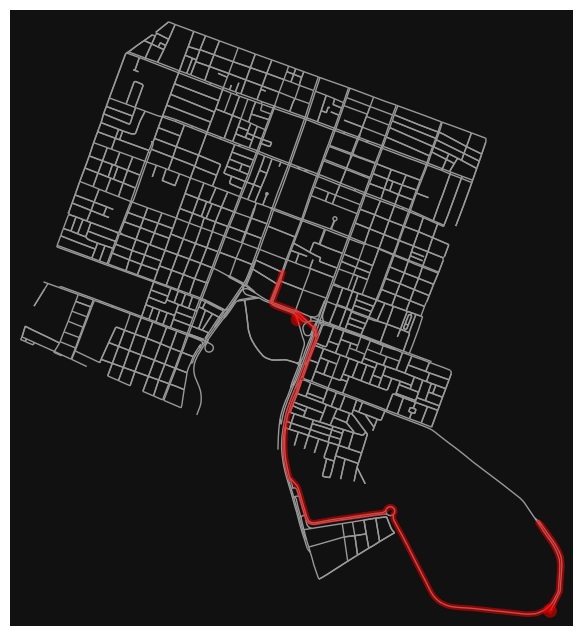

Nó de origem: 7229350799, Destino: 5967866720


In [ ]:
# encontra o caminho mais curto entre os nós, minimizando o tempo de viagem
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)
print(f"Nó de origem: {orig}, Destino: {dest}")



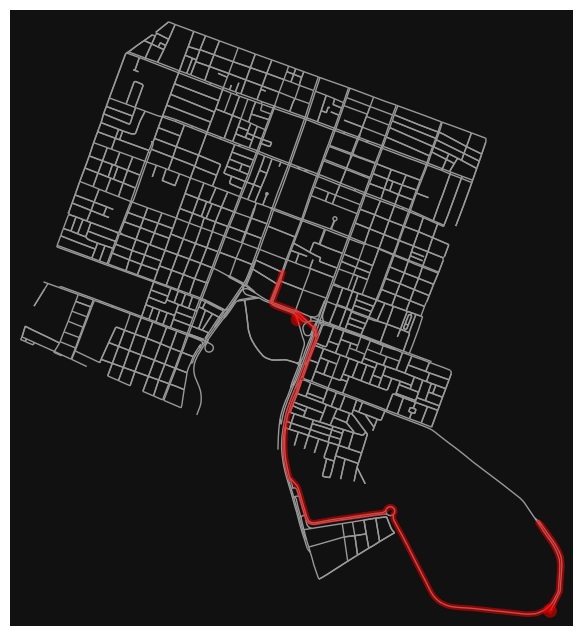

O caminho mais curto do DCA/UFRN ao Arana das Dunas é  5780.802000000001 metros.


In [ ]:


#Calcule o caminho mais curto usando o algoritmo de Dijkstra
shortest_route = nx.shortest_path(G, orig, dest, weight='length')

# Plota o caminho mais curto no mapa
fig, ax = ox.plot_graph_route(G, shortest_route, node_size=0)

# Calcula a distância total do caminho mais curto
total_distance = 0
for u, v, key, data in G.edges(data=True, keys=True): # Unpack the edge data including the key
    if u in shortest_route and v in shortest_route and shortest_route.index(u) + 1 == shortest_route.index(v):
        total_distance += data['length']

print(f"O caminho mais curto do DCA/UFRN ao Arana das Dunas é  {total_distance} metros.")